In [5]:
import os
import pandas as pd
import glob
import numpy as np

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor

%config InlineBackend.figure_formatrmat = 'retina'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [6]:
data_dir = "../data/Air_Models/"

scenario_index = pd.DataFrame({"filepath": glob.glob(os.path.join(data_dir, "IG_*_*.csv"))})
scenario_index

,filepath
0,../data/Air_Models/IG_500_390.csv
1,../data/Air_Models/IG_520_300.csv
2,../data/Air_Models/IG_530_300.csv
3,../data/Air_Models/IG_600_560.csv
4,../data/Air_Models/IG_600_400.csv
...,...
135,../data/Air_Models/IG_370_300.csv
136,../data/Air_Models/IG_600_550.csv
137,../data/Air_Models/IG_600_430.csv
138,../data/Air_Models/IG_550_340.csv


In [7]:
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=5)

train_index, test_index  = next(cv.split(scenario_index.index))
 
print("TRAIN:", train_index, "TEST:", test_index)
print("TRAIN count:", len(train_index), "TEST count:", len(test_index))

TRAIN: [  0   1   2   3   4   5   6   7   8   9  11  13  14  15  16  17  18  19
  20  22  24  26  27  28  29  30  31  32  33  34  35  36  37  38  39  41
  42  44  45  47  49  51  55  56  57  58  59  61  62  63  64  65  67  68
  69  71  72  73  76  77  78  79  80  81  82  83  84  85  86  87  88  91
  92  93  95  96  97  99 100 101 103 104 105 106 110 112 113 114 115 116
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139] TEST: [ 10  12  21  23  25  40  43  46  48  50  52  53  54  60  66  70  74  75
  89  90  94  98 102 107 108 109 111 117]
TRAIN count: 112 TEST count: 28


In [8]:
def load_data(scenario_index, selected_index):
    """ Load data from files in scenario_index with indices matching ones in selected_index"""
    
    df_arr = []
    for f in scenario_index.loc[selected_index].filepath:
        Tw = float(f.split("/")[-1].split("_")[1])
        Ti = float(f.split("/")[-1].split("_")[2].replace(".csv", ""))

        f_df = pd.read_csv(f, skiprows=12)
        f_df["Tw"] = Tw
        f_df["Ti"] = Ti
        df_arr.append(f_df)
    
    combined_df = pd.concat(df_arr)
    return combined_df

In [9]:
def load_test_data(scenario_index, selected_index):
    """ Load data from files in scenario_index with indices matching ones in selected_index"""
    
    df_arr = []
    for f in scenario_index.loc[selected_index].filepath:
        Tw = float(f.split("/")[-1].split("_")[1])
        Ti = float(f.split("/")[-1].split("_")[2].replace(".csv", ""))

        f_df = pd.read_csv(f, skiprows=12)
        f_df["Tw"] = Tw
        f_df["Ti"] = Ti
        df_arr.append(f_df)

    return df_arr

In [10]:
train_df = load_data(scenario_index, train_index)
train_df

,Time,Tc,Tf,Pc,Ra_d,Nu_d,h,dT/dt,rho,beta,k,cp,visc,Pr,cp.1,Tw,Ti
0,0.00,390.000,445.000,1300000.000,518600.0,12.100,31.83,40.0100,10.154148,0.002247,0.0263,1007,0.000018,0.706814,1007,500.0,390.0
1,0.01,390.400,445.200,1301333.636,517100.0,12.090,31.80,39.8300,10.159997,0.002246,0.0263,1007,0.000018,0.706814,1007,500.0,390.0
2,0.02,390.798,445.399,1302661.343,515600.0,12.080,31.78,39.6500,10.165816,0.002245,0.0263,1007,0.000018,0.706814,1007,500.0,390.0
3,0.03,391.195,445.597,1303983.152,514000.0,12.070,31.75,39.4800,10.171603,0.002244,0.0263,1007,0.000018,0.706814,1007,500.0,390.0
4,0.04,391.590,445.795,1305299.092,512500.0,12.060,31.72,39.3000,10.177359,0.002243,0.0263,1007,0.000018,0.706814,1007,500.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,21.11,498.598,499.299,1661994.056,7647.0,4.103,10.79,0.1729,11.569879,0.002003,0.0263,1007,0.000018,0.706814,1007,500.0,410.0
2112,21.12,498.600,499.300,1661999.818,7638.0,4.102,10.79,0.1726,11.569899,0.002003,0.0263,1007,0.000018,0.706814,1007,500.0,410.0
2113,21.13,498.602,499.301,1662005.571,7628.0,4.100,10.78,0.1723,11.569919,0.002003,0.0263,1007,0.000018,0.706814,1007,500.0,410.0
2114,21.14,498.603,499.302,1662011.316,7619.0,4.099,10.78,0.1721,11.569939,0.002003,0.0263,1007,0.000018,0.706814,1007,500.0,410.0


In [11]:
# transform a time series dataset into a supervised learning dataset
# source: https://machinelearningmastery.com/random-forest-for-time-series-forecasting/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    #n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = pd.concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [12]:
train = train_df[["Time", "Tw", "Ti", "Tc"]].to_numpy()
train

array([[0.00000e+00, 5.00000e+02, 3.90000e+02, 3.90000e+02],
       [1.00000e-02, 5.00000e+02, 3.90000e+02, 3.90400e+02],
       [2.00000e-02, 5.00000e+02, 3.90000e+02, 3.90798e+02],
       ...,
       [2.11300e+01, 5.00000e+02, 4.10000e+02, 4.98602e+02],
       [2.11400e+01, 5.00000e+02, 4.10000e+02, 4.98603e+02],
       [2.11500e+01, 5.00000e+02, 4.10000e+02, 4.98605e+02]])

In [13]:
train_shift = series_to_supervised(train)
df_ts = pd.DataFrame(train_shift)
df_ts.drop(df_ts[df_ts[0] == 21.15].index, inplace = True)
train_shift = df_ts.to_numpy()
train_shift

array([[0.00000e+00, 5.00000e+02, 3.90000e+02, ..., 5.00000e+02,
        3.90000e+02, 3.90400e+02],
       [1.00000e-02, 5.00000e+02, 3.90000e+02, ..., 5.00000e+02,
        3.90000e+02, 3.90798e+02],
       [2.00000e-02, 5.00000e+02, 3.90000e+02, ..., 5.00000e+02,
        3.90000e+02, 3.91195e+02],
       ...,
       [2.11200e+01, 5.00000e+02, 4.10000e+02, ..., 5.00000e+02,
        4.10000e+02, 4.98602e+02],
       [2.11300e+01, 5.00000e+02, 4.10000e+02, ..., 5.00000e+02,
        4.10000e+02, 4.98603e+02],
       [2.11400e+01, 5.00000e+02, 4.10000e+02, ..., 5.00000e+02,
        4.10000e+02, 4.98605e+02]])

In [14]:
test_data = load_test_data(scenario_index, test_index)
count = 0
test_df_list = list()
for test_df in test_data:
    test = test_df[["Time", "Tw", "Ti", "Tc"]].to_numpy()
    test_shift = series_to_supervised(test)
    test_df_list.append(test_shift)

In [15]:
X_train, Y_train = train_shift[:, 0:-4], train_shift[:, -1]
print(X_train)
print(Y_train)

[[0.00000e+00 5.00000e+02 3.90000e+02 3.90000e+02]
 [1.00000e-02 5.00000e+02 3.90000e+02 3.90400e+02]
 [2.00000e-02 5.00000e+02 3.90000e+02 3.90798e+02]
 ...
 [2.11200e+01 5.00000e+02 4.10000e+02 4.98600e+02]
 [2.11300e+01 5.00000e+02 4.10000e+02 4.98602e+02]
 [2.11400e+01 5.00000e+02 4.10000e+02 4.98603e+02]]
[390.4   390.798 391.195 ... 498.602 498.603 498.605]


In [16]:
X_test = list()
Y_test = list()
for test_shift in test_df_list:
    X, Y = test_shift[:, 0:-5], test_shift[:, -1]
    X_test.append(X)
    Y_test.append(Y)

In [20]:
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=30)
model.fit(X_train, Y_train)

RandomForestRegressor(n_jobs=-1, random_state=30)

In [21]:
def walk_forward_validation(X_test_sample):
    predictions = list()
    Tc = X_test_sample[0][2]
    for time_step in X_test_sample:
        time_step = np.append(time_step,Tc)
        Tc = model.predict(time_step.reshape(1, -1))
        predictions.append(Tc.tolist()[0])
    return np.array(predictions)

In [22]:
count = 0
Y_hat = list()
for X_test_sample in X_test:
    Y_hat_sample = walk_forward_validation(X_test_sample)
    Y_hat.append(Y_hat_sample)
    print('Predictions:', Y_hat_sample)
    print('Expected values:', Y_test[count])
    count += 1

Predictions: [370.77944 371.57027 372.29236 ... 597.63716 597.64063 597.64401]
Expected values: [370.928 371.852 372.771 ... 597.835 597.838 597.841]
Predictions: [301.1673  302.30759 303.38644 ... 588.23105 588.24017 588.24774]
Expected values: [301.193 302.382 303.565 ... 587.693 587.697 587.7  ]
Predictions: [300.07714 300.10654 300.1484  ... 312.15248 312.21538 312.25068]
Expected values: [300.088 300.176 300.263 ... 329.285 329.286 329.287]
Predictions: [410.54367 411.03046 411.49816 ... 548.25277 548.25495 548.25695]
Expected values: [410.526 411.049 411.569 ... 548.266 548.268 548.271]
Predictions: [500.2441  500.51992 500.76513 ... 588.44707 588.45209 588.46687]
Expected values: [500.261 500.52  500.779 ... 578.527 578.529 578.53 ]
Predictions: [500.14691 500.28656 500.43179 ... 548.94411 548.96713 548.99054]
Expected values: [500.147 500.293 500.439 ... 548.809 548.81  548.812]
Predictions: [300.14854 300.21985 300.31465 ... 339.18602 339.18682 339.18742]
Expected values: [300

In [23]:
print(Y_hat)
Y_hat_temp = list()
for Y_hat_sample in Y_hat:
    for datapoint in Y_hat_sample:
        Y_hat_temp.append(datapoint)
    Y_hat_temp.append(Y_hat_sample[-1])


Y_hat_temp = np.array(Y_hat_temp)
print(Y_hat_temp)

[array([370.77944, 371.57027, 372.29236, ..., 597.63716, 597.64063,
       597.64401]), array([301.1673 , 302.30759, 303.38644, ..., 588.23105, 588.24017,
       588.24774]), array([300.07714, 300.10654, 300.1484 , ..., 312.15248, 312.21538,
       312.25068]), array([410.54367, 411.03046, 411.49816, ..., 548.25277, 548.25495,
       548.25695]), array([500.2441 , 500.51992, 500.76513, ..., 588.44707, 588.45209,
       588.46687]), array([500.14691, 500.28656, 500.43179, ..., 548.94411, 548.96713,
       548.99054]), array([300.14854, 300.21985, 300.31465, ..., 339.18602, 339.18682,
       339.18742]), array([480.05721, 480.10472, 480.15014, ..., 499.45231, 499.45626,
       499.47229]), array([300.74048, 301.42025, 302.10607, ..., 482.56808, 482.60114,
       482.63546]), array([400.10543, 400.20605, 400.31556, ..., 448.6196 , 448.6216 ,
       448.62347]), array([460.46545, 460.95922, 461.45276, ..., 598.13284, 598.13527,
       598.13717]), array([310.97209, 311.90382, 312.82114, ..

In [24]:
#test_df["Tc_hat"] = np.append(Y_hat_temp, Y_hat_temp[-1])
test_df = load_data(scenario_index, test_index)
test_df["Tc_hat"] = Y_hat_temp
test_df

,Time,Tc,Tf,Pc,Ra_d,Nu_d,h,dT/dt,rho,beta,k,cp,visc,Pr,cp.1,Tw,Ti,Tc_hat
0,0.00,370.000,485.000,1233333.333,753900.0,13.420,35.310,92.80000,8.838913,0.002062,0.0263,1007,0.000018,0.706814,1007,600.0,370.0,370.77944
1,0.01,370.928,485.464,1236426.650,752400.0,13.420,35.290,92.38000,8.852613,0.002060,0.0263,1007,0.000018,0.706814,1007,600.0,370.0,371.57027
2,0.02,371.852,485.926,1239505.853,751000.0,13.410,35.270,91.95000,8.866224,0.002058,0.0263,1007,0.000018,0.706814,1007,600.0,370.0,372.29236
3,0.03,372.771,486.386,1242570.998,749500.0,13.400,35.250,91.53000,8.879747,0.002056,0.0263,1007,0.000018,0.706814,1007,600.0,370.0,373.15517
4,0.04,373.687,486.843,1245622.143,748100.0,13.400,35.230,91.12000,8.893183,0.002054,0.0263,1007,0.000018,0.706814,1007,600.0,370.0,373.97618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,21.11,549.421,549.711,1831404.559,2872.0,3.279,8.624,0.05703,11.580045,0.001819,0.0263,1007,0.000018,0.706814,1007,550.0,540.0,588.44421
2112,21.12,549.422,549.711,1831406.460,2869.0,3.279,8.622,0.05696,11.580051,0.001819,0.0263,1007,0.000018,0.706814,1007,550.0,540.0,588.44707
2113,21.13,549.423,549.711,1831408.359,2866.0,3.278,8.621,0.05689,11.580057,0.001819,0.0263,1007,0.000018,0.706814,1007,550.0,540.0,588.45209
2114,21.14,549.423,549.712,1831410.255,2864.0,3.277,8.619,0.05682,11.580063,0.001819,0.0263,1007,0.000018,0.706814,1007,550.0,540.0,588.46687


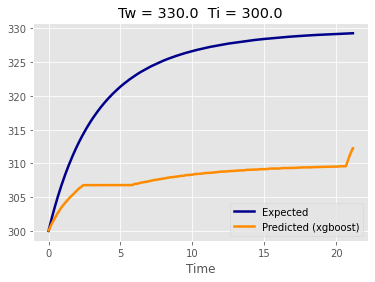

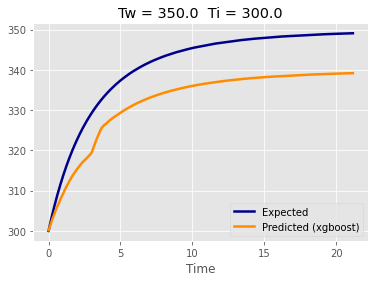

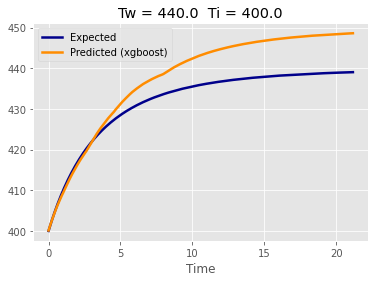

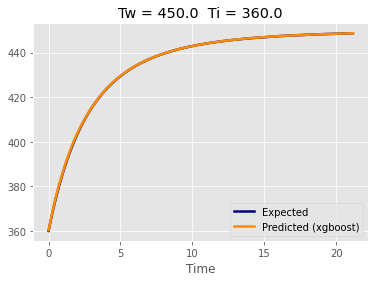

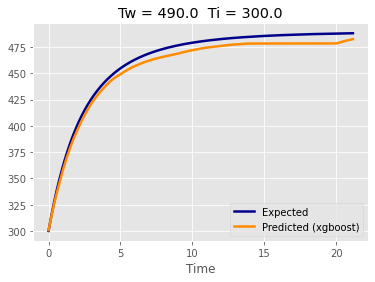

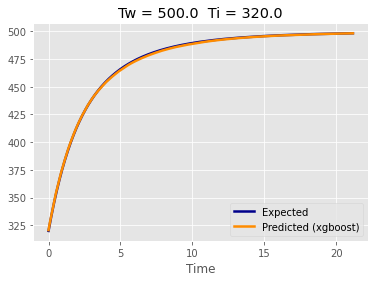

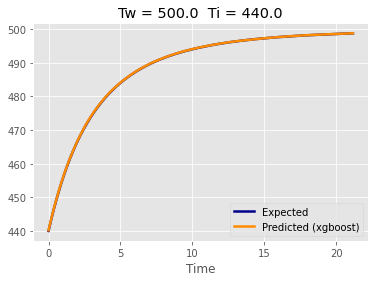

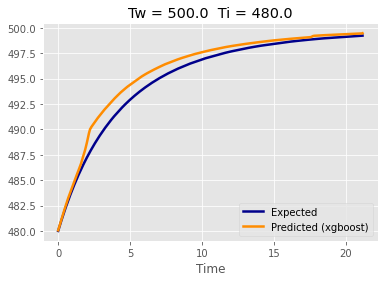

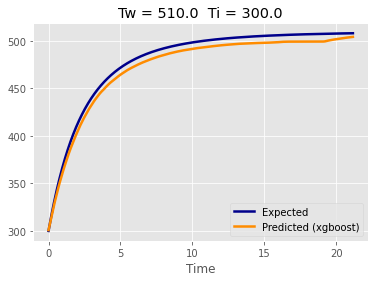

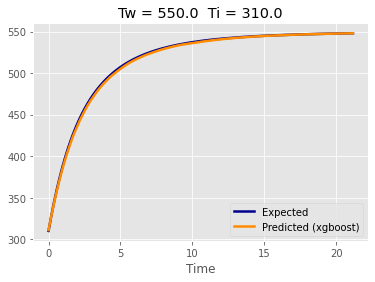

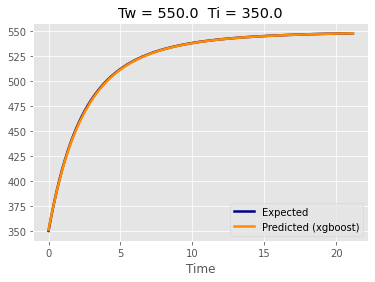

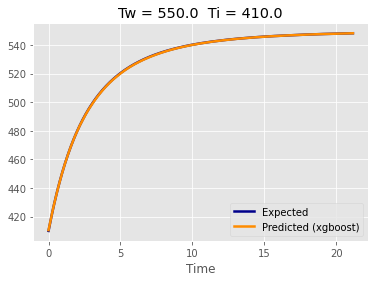

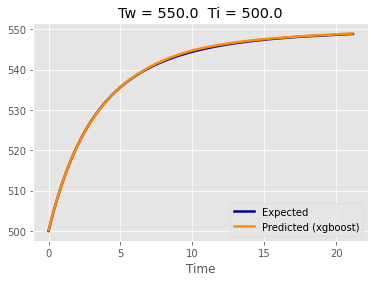

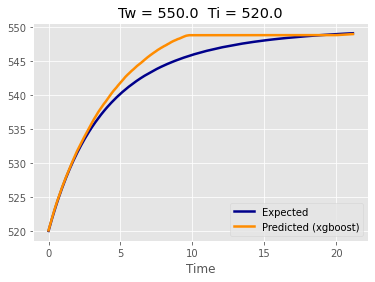

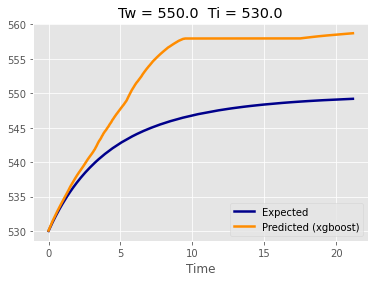

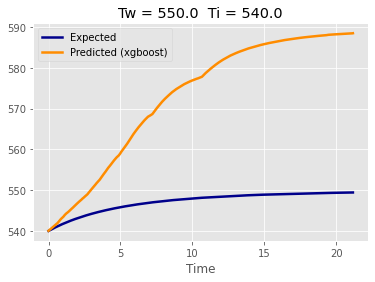

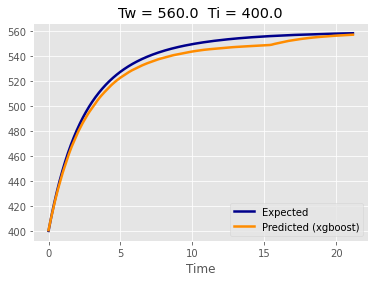

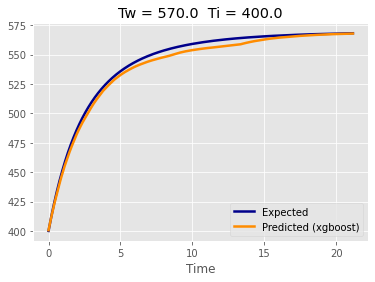

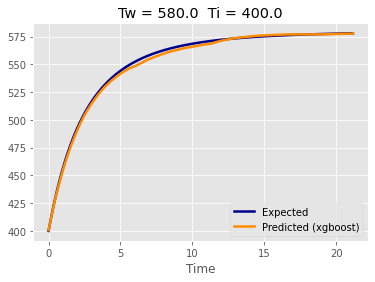

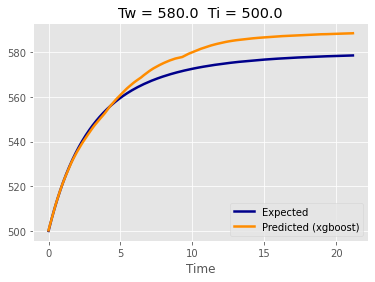

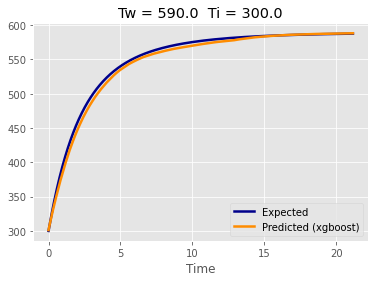

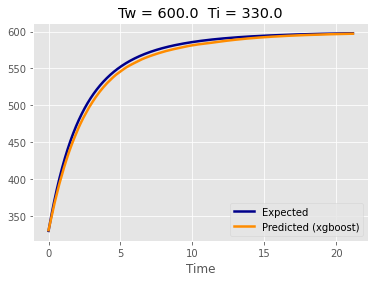

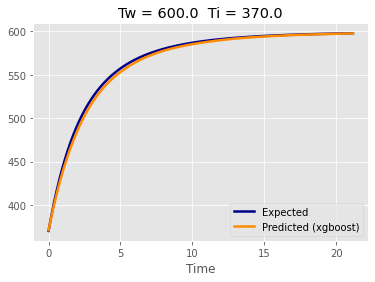

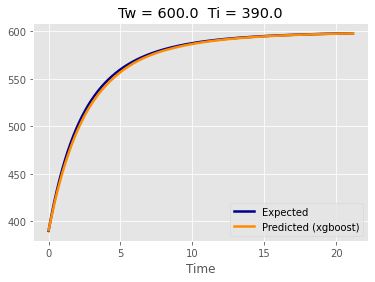

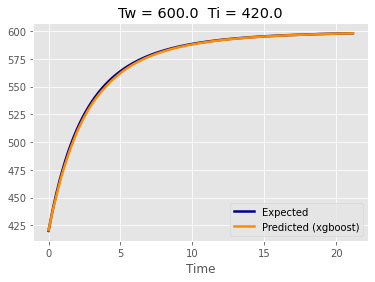

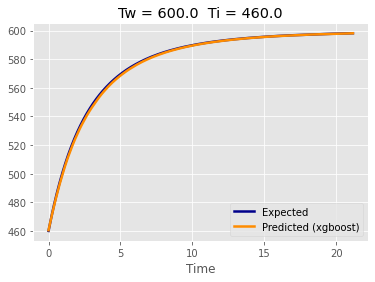

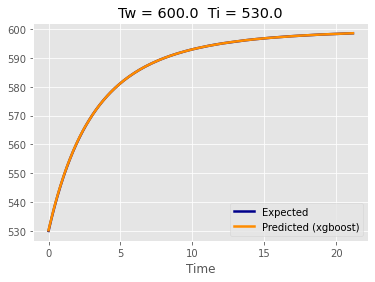

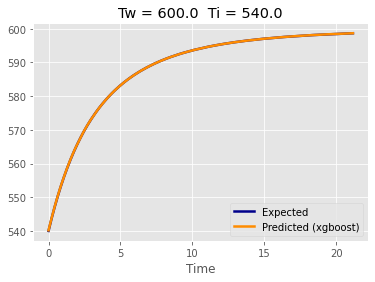

In [25]:
import matplotlib
for idx, grp in test_df.groupby(["Tw", "Ti"]):
    ax = grp.plot(x="Time", y='Tc', c='DarkBlue', linewidth=2.5, label="Expected")
    plot = grp.plot(x="Time", y='Tc_hat', c='DarkOrange', linewidth=2.5, label="Predicted (xgboost)", ax=ax)
    plt.title('Tw = {Tw}  Ti = {Ti}'.format(Tw=idx[0], Ti=idx[1]))
    plt.show()

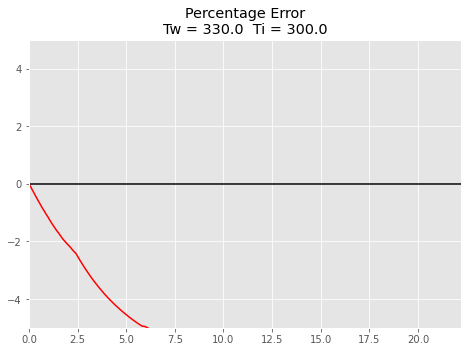

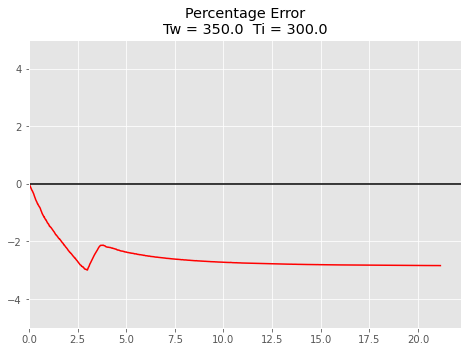

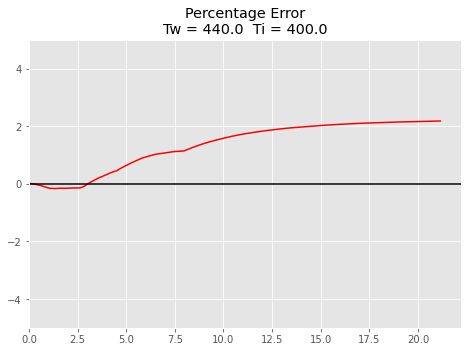

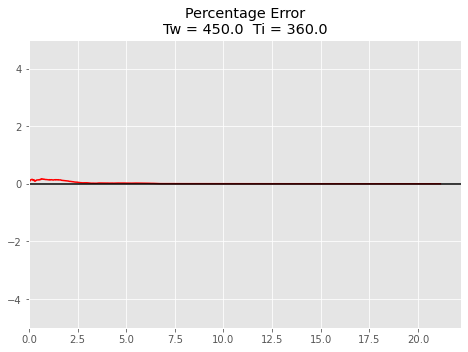

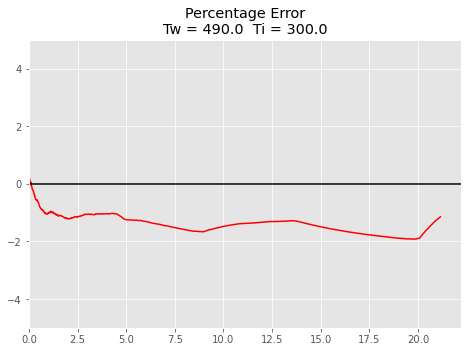

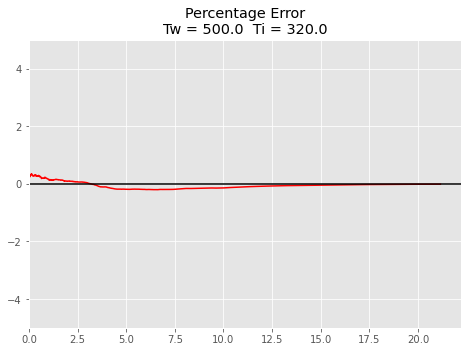

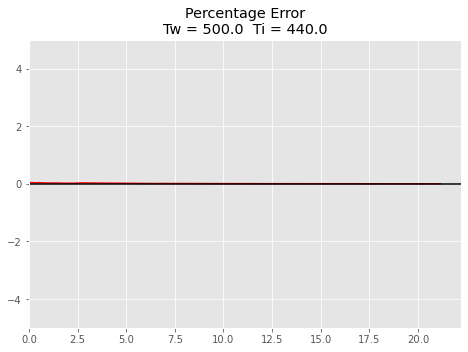

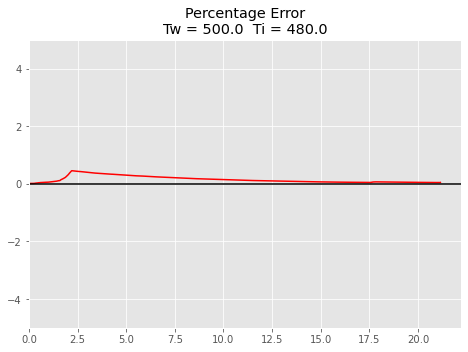

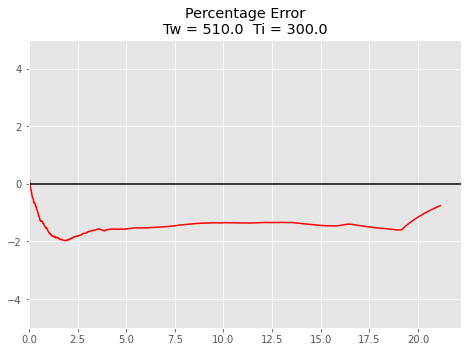

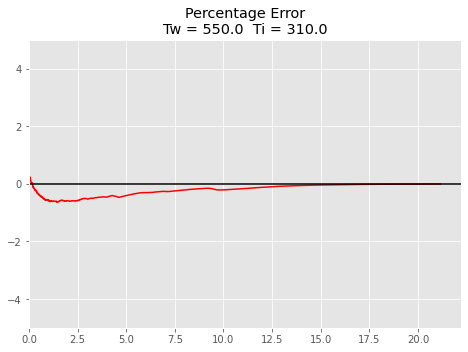

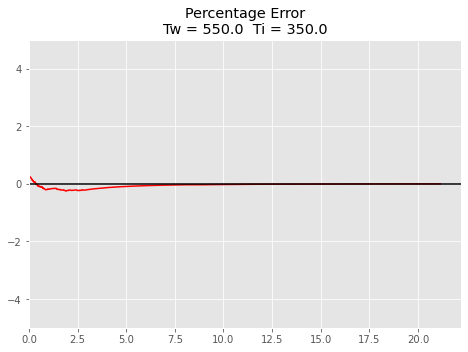

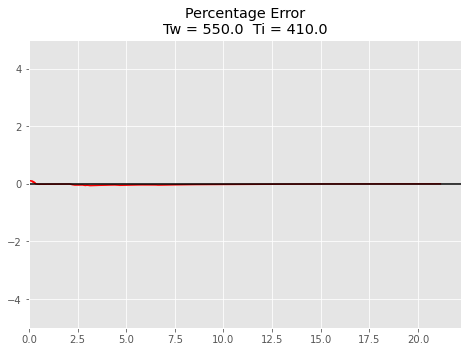

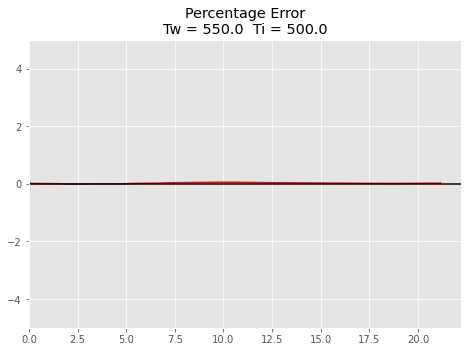

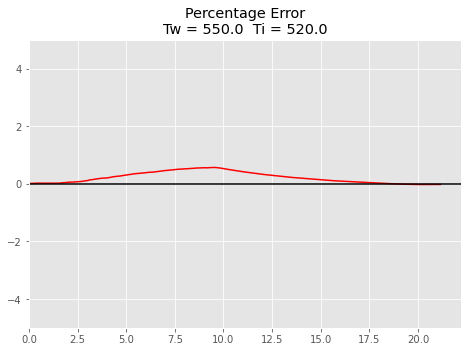

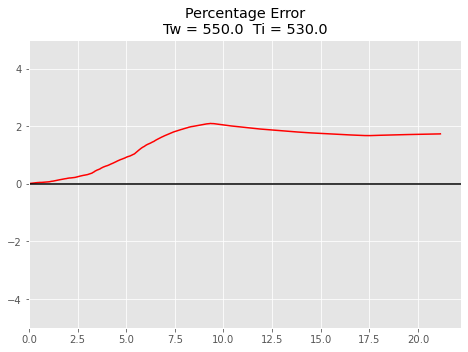

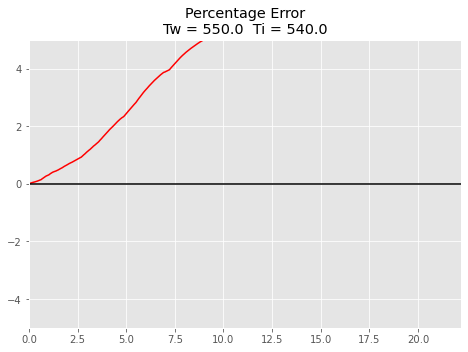

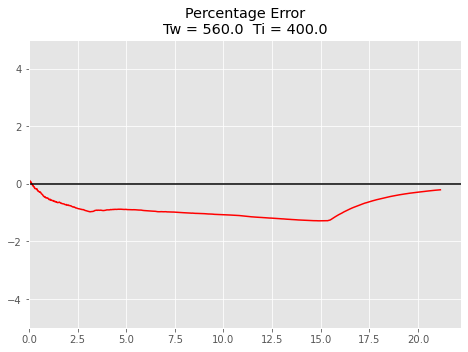

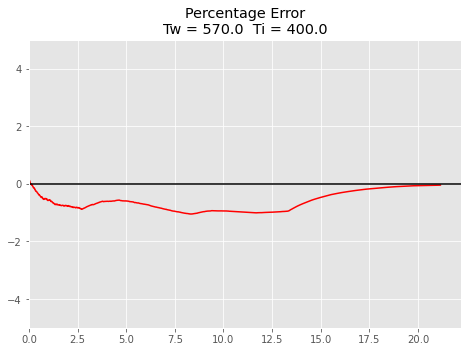

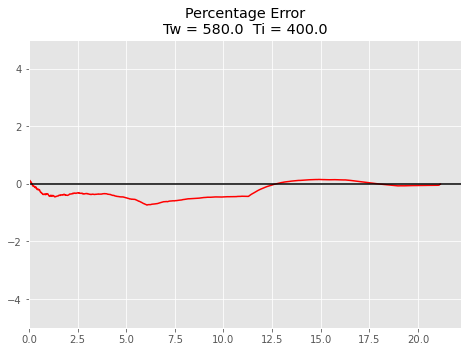

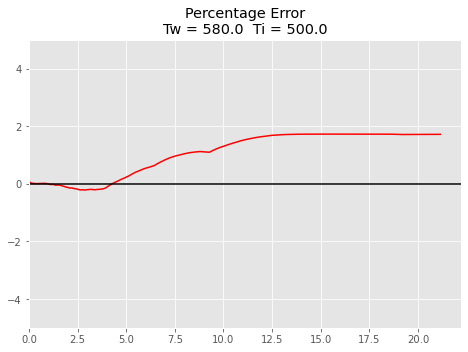

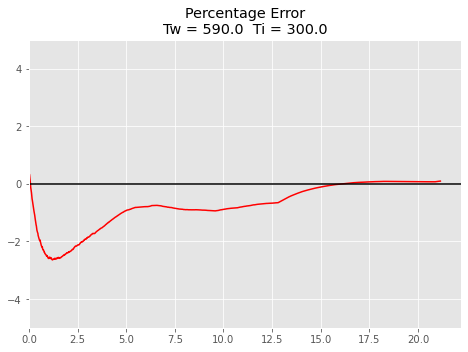

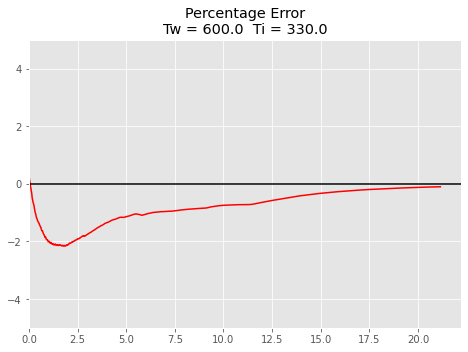

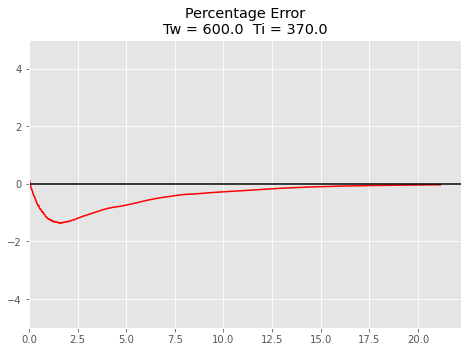

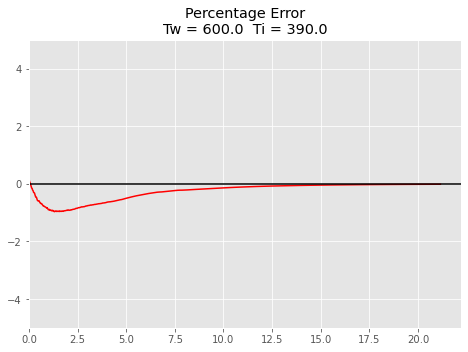

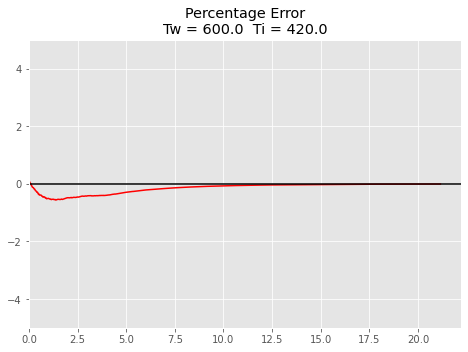

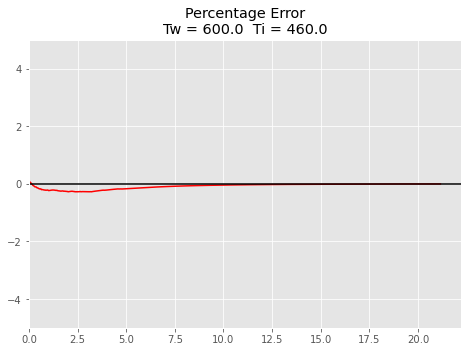

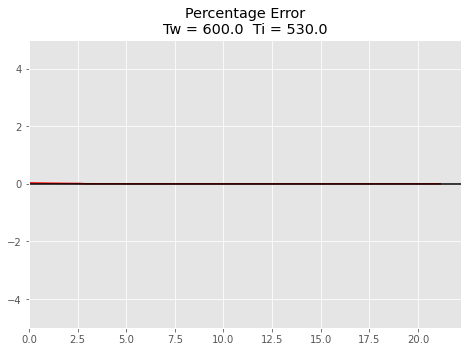

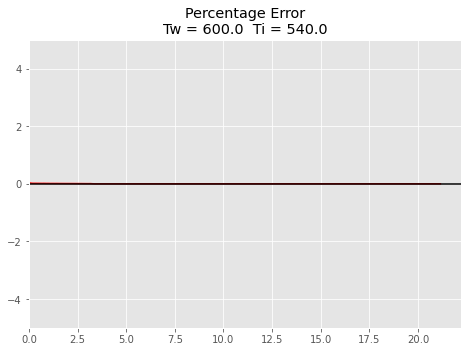

In [26]:
import matplotlib
for idx, grp in test_df.groupby(["Tw", "Ti"]):
    err = 100*(grp['Tc_hat'] - grp['Tc'])/grp['Tc']
    ax = plt.figure().add_axes([0,0,1,1])
    ax.plot(grp['Time'], err, color='r')
    ax.set_ylim(bottom=-5,top=5)
    ax.set_xlim(left=0)
    plt.title('Percentage Error\nTw = {Tw}  Ti = {Ti}'.format(Tw=idx[0], Ti=idx[1]))
    plt.axhline(0, color='black')
    plt.show()

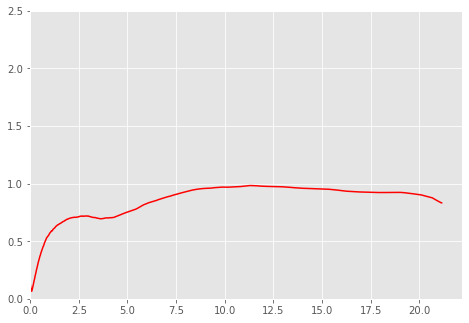

In [37]:
count = 0
for idx, grp in test_df.groupby(["Tw", "Ti"]):
    if count == 0:
        avg_err = abs(100*(grp['Tc_hat'] - grp['Tc'])/grp['Tc'])
    else:
        avg_err += abs(100*(grp['Tc_hat'] - grp['Tc'])/grp['Tc'])
    count += 1

avg_err /= count
ax = plt.figure().add_axes([0,0,1,1])
ax.plot(grp['Time'], avg_err, color='r')
ax.set_ylim(bottom=0,top=2.5)
ax.set_xlim(left=0)
#plt.title('Average Percentage Error at Time Step t')
#plt.axhline(0, color='black')
plt.show()

In [27]:
perc_err = (test_df["Tc_hat"] - test_df["Tc"])/test_df["Tc"]
avg_err = 0
cnt = 0
for item in perc_err:
    avg_err += abs(item)
    cnt += 1

avg_err /= cnt
acc = 1 - avg_err
print('Accuracy:',acc)

Accuracy: 0.9914522982493266


<AxesSubplot:>

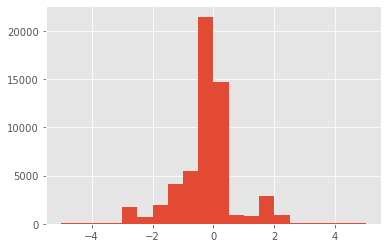

In [35]:
(100*(test_df["Tc_hat"] - test_df["Tc"])/test_df["Tc"]).hist(bins=20, range=(-5, 5))

<AxesSubplot:>

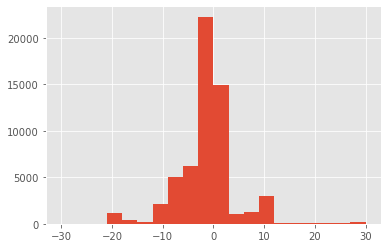

In [29]:
(test_df["Tc_hat"] - test_df["Tc"]).hist(bins=20, range=(-30, 30))

In [30]:
Tdiff_err = [[],[]]
for idx, grp in test_df.groupby(["Tw", "Ti"]):
    grp_diff = abs(grp["Tc"] - grp["Tc_hat"])
    avg_err = grp_diff.sum()
    T_diff = idx[0] - idx[1]
    print(idx, T_diff, avg_err)
    Tdiff_err[0].append(T_diff)
    Tdiff_err[1].append(avg_err)

(330.0, 300.0) 30.0 33862.426020000035
(350.0, 300.0) 50.0 18574.599779999993
(440.0, 400.0) 40.0 12642.542710000005
(450.0, 360.0) 90.0 174.86794000002266
(490.0, 300.0) 190.0 13941.610479999861
(500.0, 320.0) 180.0 968.027220000017
(500.0, 440.0) 60.0 105.96156999996248
(500.0, 480.0) 20.0 1568.4008599999981
(510.0, 300.0) 210.0 14552.802519999996
(550.0, 310.0) 240.0 2101.357579999978
(550.0, 350.0) 200.0 555.6290000000251
(550.0, 410.0) 140.0 218.71533000002842
(550.0, 500.0) 50.0 273.086419999966
(550.0, 520.0) 30.0 2562.4986899999903
(550.0, 530.0) 20.0 16427.938279999868
(550.0, 540.0) 10.0 54334.689419999966
(560.0, 400.0) 160.0 9846.687590000005
(570.0, 400.0) 170.0 7048.125250000028
(580.0, 400.0) 180.0 3324.5466299999853
(580.0, 500.0) 80.0 13518.142779999984
(590.0, 300.0) 290.0 8436.225969999963
(600.0, 330.0) 270.0 8900.396330000001
(600.0, 370.0) 230.0 4516.465429999983
(600.0, 390.0) 210.0 2916.917760000003
(600.0, 420.0) 180.0 1679.2371500000017
(600.0, 460.0) 140.0 96

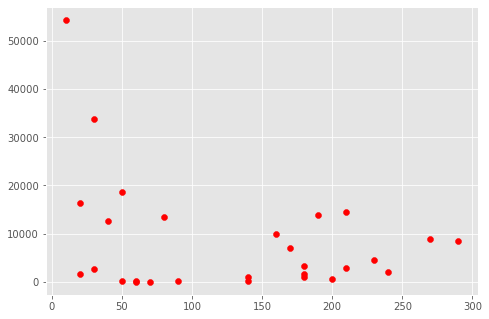

In [31]:
ax = plt.figure().add_axes([0,0,1,1])
ax.scatter(Tdiff_err[0], Tdiff_err[1], color='r')
plt.show()

In [32]:
features_importance = model.feature_importances_

features = ["Time", "Tw", "Ti", "Tc-1"]
print("Feature ranking:")
for i, feature in enumerate(features):
    print("{}. {} ({})".format(i + 1, feature, features_importance[i]))

Feature ranking:
1. Time (2.9003781293840565e-07)
2. Tw (1.3858429215495826e-06)
3. Ti (9.270782461664112e-09)
4. Tc-1 (0.9999983148484831)


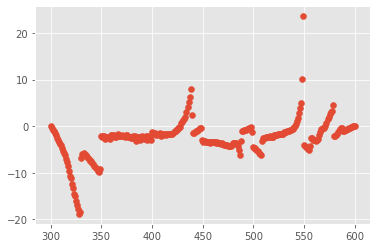

In [33]:
import math

avg_tc_diff = {}

for i in range(300, 601):
    avg_tc_diff[i] = [0,0]

tc_hat_list = test_df['Tc_hat'].tolist()
for i, temp in enumerate(test_df["Tc"]):
    avg_tc_diff[math.floor(temp)][0] += tc_hat_list[i] - temp
    avg_tc_diff[math.floor(temp)][1] += 1

temp = []
diff = []
for key, value in avg_tc_diff.items():
    if avg_tc_diff[key][1] > 0:
        avg_tc_diff[key][0] /= avg_tc_diff[key][1]
    temp.append(key)
    diff.append(avg_tc_diff[key][0])
    
plt.scatter(temp, diff)
plt.show()

In [34]:
print(r2_score(test_df["Tc"],test_df["Tc_hat"]))

0.9895802332514174
